In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# use college scorecard 2017-18 acedemic year

column_list = ["UNITID", "INSTNM", "STABBR", "ST_FIPS", "REGION", "CONTROL", "ADM_RATE", "TUITIONFEE_IN"]
df = pd.read_csv("MERGED2017_18_PP.csv", usecols=column_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 8 columns):
UNITID           7115 non-null int64
INSTNM           7115 non-null object
STABBR           7115 non-null object
CONTROL          7115 non-null int64
ST_FIPS          7115 non-null int64
REGION           7115 non-null int64
ADM_RATE         2037 non-null float64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 444.8+ KB


In [69]:
df.head()

UNITID                               INSTNM STABBR  CONTROL  ST_FIPS  \
0  100654             Alabama A & M University     AL        1        1   
1  100663  University of Alabama at Birmingham     AL        1        1   
2  100690                   Amridge University     AL        2        1   
3  100706  University of Alabama in Huntsville     AL        1        1   
4  100724             Alabama State University     AL        1        1   

   REGION  ADM_RATE  TUITIONFEE_IN  
0       5    0.9027         9857.0  
1       5    0.9181         8328.0  
2       5       NaN         6900.0  
3       5    0.8123        10280.0  
4       5    0.9787        11068.0

In [38]:
# the mapping between State FIPS code and State name is from the dictionary
# We would like to replace the cryptic number with name
# saved the mapping to a text file which is tab delimited
# Read the text file in

state_df = pd.read_csv("STATE_FIPS.txt", sep="\t", header=None, names=["ST_FIPS", "STATE_NAME"])
state_df

ST_FIPS                      STATE_NAME
0         1                         Alabama
1         2                          Alaska
2         4                         Arizona
3         5                        Arkansas
4         6                      California
5         8                        Colorado
6         9                     Connecticut
7        10                        Delaware
8        11            District of Columbia
9        12                         Florida
10       13                         Georgia
11       15                          Hawaii
12       16                           Idaho
13       17                        Illinois
14       18                         Indiana
15       19                            Iowa
16       20                          Kansas
17       21                        Kentucky
18       22                       Louisiana
19       23                           Maine
20       24                        Maryland
21       25                   Massachusetts
22       26                        Michigan
23       27                       Minnesota
24       28                     Mississippi
25       29                        Missouri
26       30                         Montana
27       31                        Nebraska
28       32                          Nevada
29       33                   New Hampshire
30       34                      New Jersey
31       35                      New Mexico
32       36                        New York
33       37                  North Carolina
34       38                    North Dakota
35       39                            Ohio
36       40                        Oklahoma
37       41                          Oregon
38       42                    Pennsylvania
39       44                    Rhode Island
40       45                  South Carolina
41       46                    South Dakota
42       47                       Tennessee
43       48                           Texas
44       49                            Utah
45       50                         Vermont
46       51                        Virginia
47       53                      Washington
48       54                   West Virginia
49       55                       Wisconsin
50       56                         Wyoming
51       60                  American Samoa
52       64  Federated States of Micronesia
53       66                            Guam
54       69        Northern Mariana Islands
55       70                           Palau
56       72                     Puerto Rico
57       78                  Virgin Islands

In [39]:
### Turn the data two columns into a dictionary

state_dict = dict(zip(state_df["ST_FIPS"], state_df["STATE_NAME"]))
state_dict

{1: 'Alabama',
 2: 'Alaska',
 4: 'Arizona',
 5: 'Arkansas',
 6: 'California',
 8: 'Colorado',
 9: 'Connecticut',
 10: 'Delaware',
 11: 'District of Columbia',
 12: 'Florida',
 13: 'Georgia',
 15: 'Hawaii',
 16: 'Idaho',
 17: 'Illinois',
 18: 'Indiana',
 19: 'Iowa',
 20: 'Kansas',
 21: 'Kentucky',
 22: 'Louisiana',
 23: 'Maine',
 24: 'Maryland',
 25: 'Massachusetts',
 26: 'Michigan',
 27: 'Minnesota',
 28: 'Mississippi',
 29: 'Missouri',
 30: 'Montana',
 31: 'Nebraska',
 32: 'Nevada',
 33: 'New Hampshire',
 34: 'New Jersey',
 35: 'New Mexico',
 36: 'New York',
 37: 'North Carolina',
 38: 'North Dakota',
 39: 'Ohio',
 40: 'Oklahoma',
 41: 'Oregon',
 42: 'Pennsylvania',
 44: 'Rhode Island',
 45: 'South Carolina',
 46: 'South Dakota',
 47: 'Tennessee',
 48: 'Texas',
 49: 'Utah',
 50: 'Vermont',
 51: 'Virginia',
 53: 'Washington',
 54: 'West Virginia',
 55: 'Wisconsin',
 56: 'Wyoming',
 60: 'American Samoa',
 64: 'Federated States of Micronesia',
 66: 'Guam',
 69: 'Northern Mariana Islands'

In [40]:
df.describe(include="all")

UNITID                   INSTNM STABBR      ST_FIPS  \
count   7.115000e+03                     7115   7115  7115.000000   
unique           NaN                     6981     59          NaN   
top              NaN  Stevens-Henager College     CA          NaN   
freq             NaN                        7    716          NaN   
mean    1.866527e+06                      NaN    NaN    29.131975   
std     6.957330e+06                      NaN    NaN    16.741847   
min     1.006540e+05                      NaN    NaN     1.000000   
25%     1.740965e+05                      NaN    NaN    13.000000   
50%     2.290270e+05                      NaN    NaN    29.000000   
75%     4.506095e+05                      NaN    NaN    42.000000   
max     4.900540e+07                      NaN    NaN    78.000000   

             REGION     ADM_RATE  TUITIONFEE_IN  
count   7115.000000  2037.000000    4028.000000  
unique          NaN          NaN            NaN  
top             NaN          NaN            NaN  
freq            NaN          NaN            NaN  
mean       4.611244     0.681822   15081.399950  
std        2.171476     0.212179   12723.724262  
min        0.000000     0.000000       0.000000  
25%        3.000000     0.550000    5246.250000  
50%        5.000000     0.707600   11296.000000  
75%        6.000000     0.838400   19400.000000  
max        9.000000     1.000000   74514.000000

In [41]:
# The region should be a categorical variable instead of an ingteger
df["REGION"] = df["REGION"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 7 columns):
UNITID           7115 non-null int64
INSTNM           7115 non-null object
STABBR           7115 non-null object
ST_FIPS          7115 non-null int64
REGION           7115 non-null object
ADM_RATE         2037 non-null float64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 389.2+ KB


In [70]:
df.describe(include="all")

UNITID                   INSTNM STABBR      CONTROL  \
count   7.115000e+03                     7115   7115  7115.000000   
unique           NaN                     6981     59          NaN   
top              NaN  Stevens-Henager College     CA          NaN   
freq             NaN                        7    716          NaN   
mean    1.866527e+06                      NaN    NaN     2.129585   
std     6.957330e+06                      NaN    NaN     0.834534   
min     1.006540e+05                      NaN    NaN     1.000000   
25%     1.740965e+05                      NaN    NaN     1.000000   
50%     2.290270e+05                      NaN    NaN     2.000000   
75%     4.506095e+05                      NaN    NaN     3.000000   
max     4.900540e+07                      NaN    NaN     3.000000   

            ST_FIPS       REGION     ADM_RATE  TUITIONFEE_IN  
count   7115.000000  7115.000000  2037.000000    4028.000000  
unique          NaN          NaN          NaN            NaN  
top             NaN          NaN          NaN            NaN  
freq            NaN          NaN          NaN            NaN  
mean      29.131975     4.611244     0.681822   15081.399950  
std       16.741847     2.171476     0.212179   12723.724262  
min        1.000000     0.000000     0.000000       0.000000  
25%       13.000000     3.000000     0.550000    5246.250000  
50%       29.000000     5.000000     0.707600   11296.000000  
75%       42.000000     6.000000     0.838400   19400.000000  
max       78.000000     9.000000     1.000000   74514.000000

In [71]:
df["STABBR"].unique()

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI', 'IA', 'KS',
       'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

In [72]:
df["ST_FIPS"].unique()

array([ 1,  2, 53,  4, 35,  5,  6, 27,  8,  9, 36, 10, 11, 12, 13, 15, 16,
       17, 18, 26, 19, 20, 29, 21, 22, 23, 24, 25, 28, 30, 31, 32, 33, 34,
       37, 38, 39, 54, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 55, 56,
       60, 66, 69, 72, 64, 70, 78, 68], dtype=int64)

In [73]:
# Create a new column "STATE_NAME" based on the dictionary created earlier

df["STATE_NAME"] = df["ST_FIPS"].map(state_dict)
df.sample(20)

UNITID                                             INSTNM STABBR  \
2580  199838                  Vance-Granville Community College     NC   
1037  148140                           Vatterott College-Quincy     IL   
3517  227924                                San Antonio College     TX   
3359  221333    Tennessee College of Applied Technology-Pulaski     TN   
1415  160904                     Xavier University of Louisiana     LA   
6210  482477                          DeVry University-Illinois     IL   
1154  153083                         Capri College-Cedar Rapids     IA   
2871  208123                          Abdill Career College Inc     OR   
1488  163541                    Hair Academy Inc-New Carrollton     MD   
499   124487                                 Epic Bible College     CA   
1165  153296                        Ellsworth Community College     IA   
511   125499                                West Valley College     CA   
6039  476869                                Austin Kade Academy     ID   
5128  446109  Cambridge Institute of Allied Health & Technology     FL   
1746  173142                           Bethany Lutheran College     MN   
3977  243647                            Palau Community College     PW   
5553  456287                 College of Hair Design-East Campus     NE   
78    104160                            Arizona Western College     AZ   
1472  162830                           Aveda Institute-Maryland     MD   
3778  237011                      Western Washington University     WA   

      CONTROL  ST_FIPS  REGION  ADM_RATE  TUITIONFEE_IN      STATE_NAME  
2580        1       37       5       NaN         1948.0  North Carolina  
1037        3       17       3       NaN        11007.0        Illinois  
3517        1       48       6       NaN         2760.0           Texas  
3359        1       47       5       NaN            NaN       Tennessee  
1415        2       22       5    0.6408        23606.0       Louisiana  
6210        3       17       3    0.9473        17316.0        Illinois  
1154        3       19       4       NaN            NaN            Iowa  
2871        3       41       8       NaN            NaN          Oregon  
1488        3       24       2       NaN            NaN        Maryland  
499         2        6       8       NaN         9689.0      California  
1165        1       19       4       NaN         4656.0            Iowa  
511         1        6       8       NaN         1186.0      California  
6039        3       16       7       NaN            NaN           Idaho  
5128        3       12       5       NaN            NaN         Florida  
1746        2       27       4    0.7912        26830.0       Minnesota  
3977        1       70       9       NaN         3250.0           Palau  
5553        3       31       4       NaN            NaN        Nebraska  
78          1        4       6       NaN         2660.0         Arizona  
1472        3       24       2       NaN            NaN        Maryland  
3778        1       53       8    0.8479         8183.0      Washington

In [74]:
df["STATE_NAME"].unique()

array(['Alabama', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Arkansas', 'California', 'Minnesota', 'Colorado', 'Connecticut',
       'New York', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Michigan',
       'Iowa', 'Kansas', 'Missouri', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Mississippi', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'North Carolina',
       'North Dakota', 'Ohio', 'West Virginia', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Wisconsin',
       'Wyoming', 'American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Federated States of Micronesia', 'Palau',
       'Virgin Islands', nan], dtype=object)

In [75]:
df[df["STATE_NAME"].isna()]

UNITID                           INSTNM STABBR  CONTROL  ST_FIPS  \
4267  376695  College of the Marshall Islands     MH        1       68   

      REGION  ADM_RATE  TUITIONFEE_IN STATE_NAME  
4267       9       NaN         4885.0        NaN

In [76]:
# Calculate the mean value of ADM_RATE and TUITIONFEE_IN using groupby
# The result is a new dataframe and can be used for further analysis

by_state_df = df.groupby("STATE_NAME").mean().reset_index()
by_state_df.head()

STATE_NAME        UNITID   CONTROL  ST_FIPS  REGION  ADM_RATE  \
0         Alabama  1.406427e+06  1.797872      1.0     5.0  0.680033   
1          Alaska  1.773741e+05  1.555556      2.0     8.0  0.791450   
2  American Samoa  2.407360e+05  1.000000     60.0     9.0       NaN   
3         Arizona  1.977872e+06  2.312000      4.0     6.0  0.742611   
4        Arkansas  1.850123e+06  2.000000      5.0     5.0  0.720705   

   TUITIONFEE_IN  
0   10106.746479  
1    8789.142857  
2    3950.000000  
3    9726.653846  
4    9028.905660

In [77]:
# Round up to 2 decimals

by_state_df = by_state_df.round({"ADM_RATE":2, "TUITIONFEE_IN":2})
by_state_df.head()

STATE_NAME        UNITID   CONTROL  ST_FIPS  REGION  ADM_RATE  \
0         Alabama  1.406427e+06  1.797872      1.0     5.0      0.68   
1          Alaska  1.773741e+05  1.555556      2.0     8.0      0.79   
2  American Samoa  2.407360e+05  1.000000     60.0     9.0       NaN   
3         Arizona  1.977872e+06  2.312000      4.0     6.0      0.74   
4        Arkansas  1.850123e+06  2.000000      5.0     5.0      0.72   

   TUITIONFEE_IN  
0       10106.75  
1        8789.14  
2        3950.00  
3        9726.65  
4        9028.91

In [101]:
# sort the dataframe

by_state_df.sort_values('TUITIONFEE_IN', ascending=True, inplace=True)
by_state_df.head()

STATE_NAME    UNITID  CONTROL  ST_FIPS  REGION  \
42                           Palau  243647.0      1.0     70.0     9.0   
57                         Wyoming  240640.5      1.3     56.0     7.0   
2                   American Samoa  240736.0      1.0     60.0     9.0   
38        Northern Mariana Islands  240790.0      1.0     69.0     9.0   
10  Federated States of Micronesia  243638.0      1.0     64.0     9.0   

    ADM_RATE  TUITIONFEE_IN  
42       NaN        3250.00  
57      0.97        3384.75  
2        NaN        3950.00  
38       NaN        4038.00  
10      0.71        4750.00

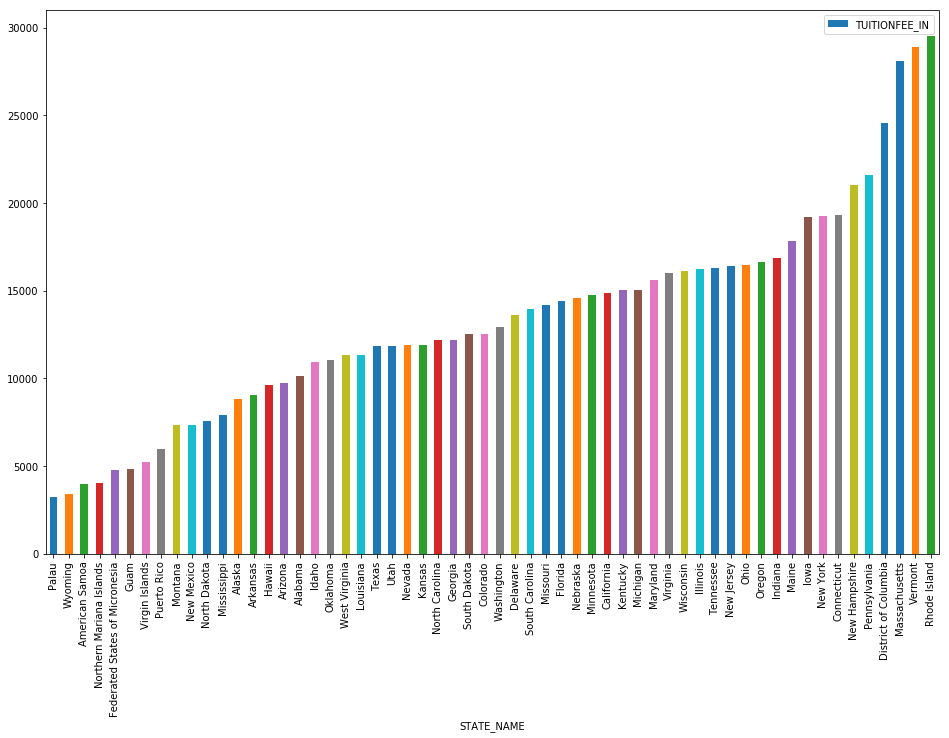

In [98]:
# Make a bar plot which gives us a sense of how expense each state is 

fig, ax = plt.subplots(figsize=(16,10))
by_state_df.plot.bar(x="STATE_NAME", y="TUITIONFEE_IN",ax=ax)

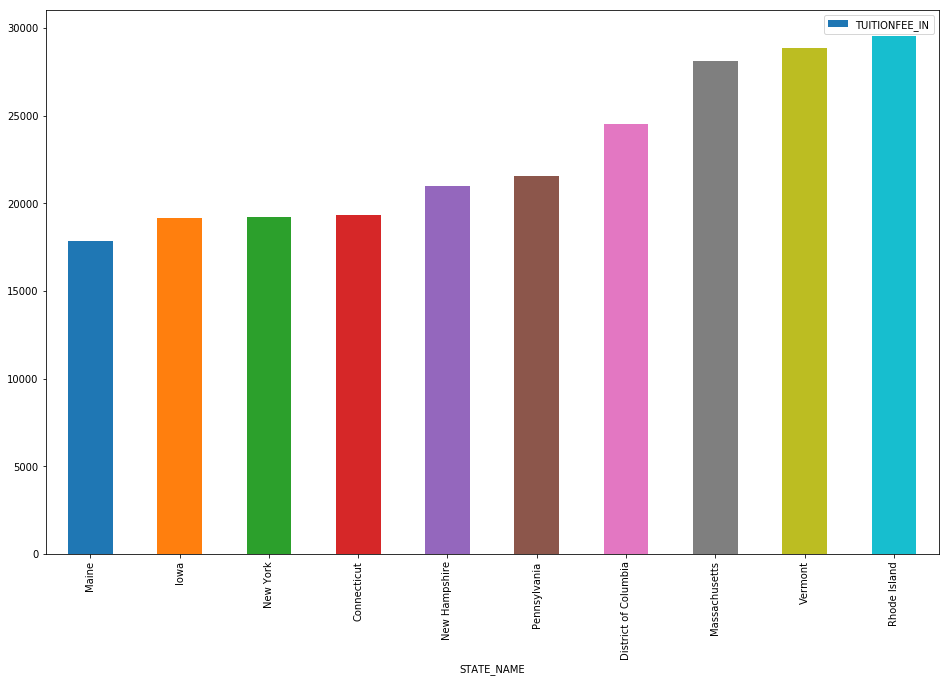

In [99]:
# Make a bar plot of top 10 states that are most expensive 

fig, ax = plt.subplots(figsize=(16,10))
by_state_df.tail(10).plot.bar(x="STATE_NAME", y="TUITIONFEE_IN",ax=ax)

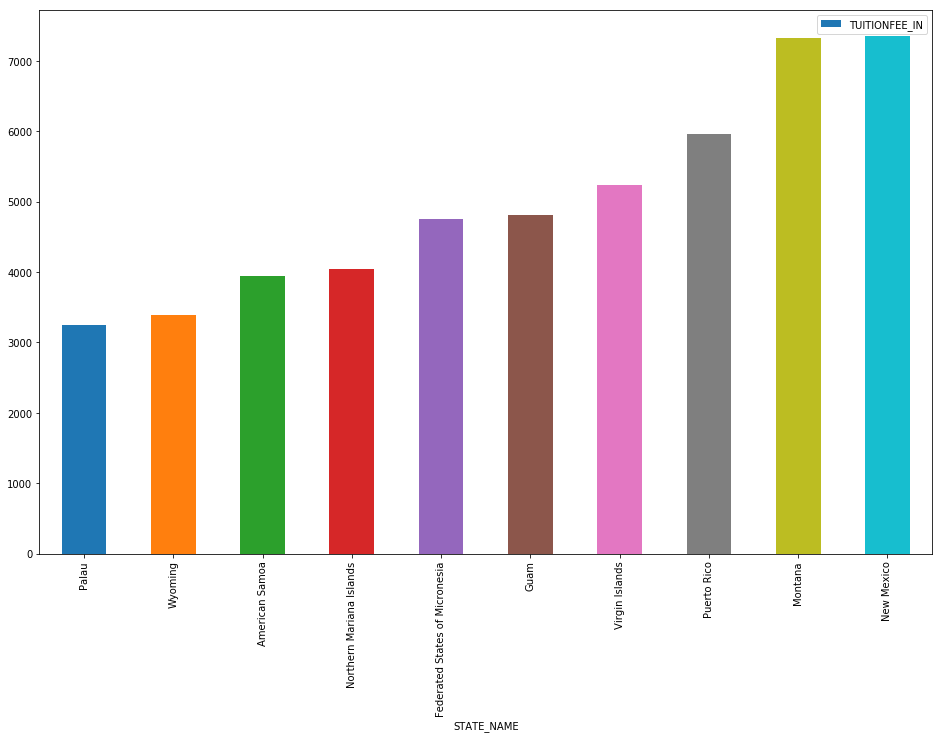

In [100]:
# Make a bar plot of  10 lease expesive states 

fig, ax = plt.subplots(figsize=(16,10))
by_state_df.head(10).plot.bar(x="STATE_NAME", y="TUITIONFEE_IN",ax=ax)

In [105]:
# Find out number of colleges each state has

df["STATE_NAME"].value_counts()

California                        716
New York                          452
Texas                             446
Florida                           412
Pennsylvania                      378
Ohio                              318
Illinois                          277
Michigan                          195
North Carolina                    188
Missouri                          180
Massachusetts                     178
Virginia                          177
Tennessee                         176
Georgia                           175
New Jersey                        162
Indiana                           155
Puerto Rico                       146
Louisiana                         131
Oklahoma                          129
Arizona                           125
Minnesota                         124
Washington                        119
Colorado                          113
South Carolina                    110
Wisconsin                         109
Kentucky                          101
Alabama     

In [ ]:
# The end